# Logistic and Linear Regression

In this notebook we look at plotting 1D, 2D and k-D cases of Linear and Logistic Regression models, drawing from statistical distributions.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from scipy import stats
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from scipy.special import expit

## Discrete 1d case

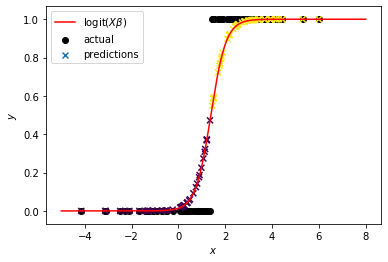

In [4]:
Xd1 = np.random.normal(loc=2, scale=2, size=(100,))
yd1 = pd.cut(stats.zscore(Xd1), [-np.inf, 0, np.inf], labels=[0, 1])

lr = LogisticRegression().fit(np.atleast_2d(Xd1).T, yd1)

plt.scatter(Xd1, yd1, color='k', label='actual')
plt.scatter(Xd1, lr.predict_proba(np.atleast_2d(Xd1).T)[:, 1], 
            marker='x', c=yd1, label='predictions')
X_t = np.linspace(-5, 8, 400)
y_t = expit(X_t * lr.coef_[0] + lr.intercept_)
plt.plot(X_t, y_t, 'r-', label=r'logit($X\beta$)')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend()
plt.show()

## Discrete 2d case

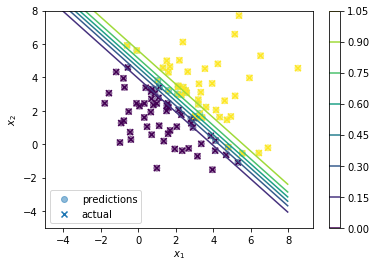

In [5]:
Xd2 = np.random.normal(loc=2, scale=2, size=(100,2))
yd2 = pd.cut(stats.zscore(np.sum(Xd2, 1)), [-np.inf, 0, np.inf], labels=[0, 1])

lr2 = LogisticRegression().fit(Xd2, yd2)

plt.scatter(Xd2[:, 0], Xd2[:, 1], alpha=.5, c=lr2.predict_proba(Xd2)[:,1], label='predictions')
plt.scatter(Xd2[:, 0], Xd2[:, 1], c=yd2, marker='x', label='actual')
G = np.mgrid[-5:8:100j, -5:8:100j]
yp = expit(np.dot(G.T, lr2.coef_.T) + lr2.intercept_).reshape(100, 100)
plt.contour(G[0], G[1], yp)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.colorbar()
plt.legend(loc='best')
plt.show()

## Discrete $k$-case

Here we use `PCA` to compress to 2d space for visualisation

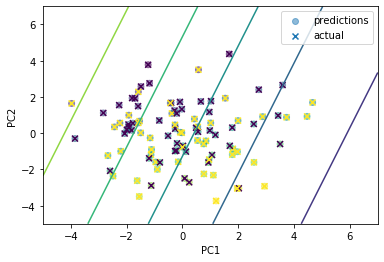

In [6]:
Xdk = np.random.normal(loc=4.2, scale=1.5, size=(100,5))
ydk = pd.cut(stats.zscore(np.sum(Xdk, 1)), [-np.inf, 0, np.inf], labels=[0, 1])

pca_dk = PCA(2).fit_transform(Xdk)
lrk = LogisticRegression().fit(pca_dk, ydk)

plt.scatter(pca_dk[:, 0], pca_dk[:, 1], alpha=.5,
            c=lrk.predict_proba(pca_dk)[:,1], label='predictions')
plt.scatter(pca_dk[:, 0], pca_dk[:, 1], c=ydk, marker='x', label='actual')
G = np.mgrid[-5:7:200j, -5:7:200j]
yp = expit(np.dot(G.T, lrk.coef_[0]) + lrk.intercept_).reshape(200, 200)
plt.contour(G[0], G[1], yp)
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

## Continuous 1d case

[1.46351208] -1.960516359650942


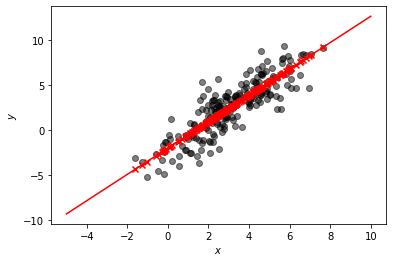

In [7]:
Xc1 = np.random.normal(loc=3, scale=2, size=(200,))
yc1 = Xc1*1.5 - 2. + np.random.normal(loc=0, scale=1.5, size=(200,))

lm1 = LinearRegression().fit(np.atleast_2d(Xc1).T, yc1)

plt.scatter(Xc1, yc1, color='k', alpha=.5)
plt.scatter(Xc1, lm1.predict(np.atleast_2d(Xc1).T), marker='x', color='r')
X_t = np.linspace(-5, 10, 400)
plt.plot(X_t, X_t*lm1.coef_ + lm1.intercept_, 'r-')
print(lm1.coef_, lm1.intercept_)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

## Continuous 2d case

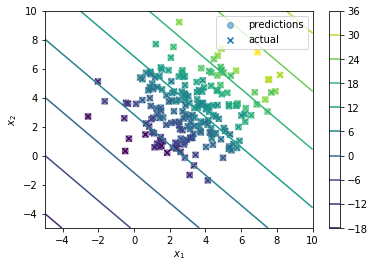

In [8]:
Xc2 = np.random.normal(loc=3, scale=2, size=(200,2))
yc2 = np.sum(Xc2,1)*1.5 + 2. + np.random.normal(loc=0, scale=1., size=(200,))

lm2 = LinearRegression().fit(Xc2, yc2)

plt.scatter(Xc2[:, 0], Xc2[:, 1], c=lm2.predict(Xc2), alpha=.5, label='predictions')
plt.scatter(Xc2[:, 0], Xc2[:, 1], c=yc2, marker='x', label='actual')
G = np.mgrid[-5:10:100j, -5:10:100j]
yp = (np.dot(G.T, lm2.coef_.T) + lm2.intercept_).reshape(100, 100)
plt.contour(G[0], G[1], yp)
plt.colorbar()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.legend()
plt.show()

## Continuous $k$-case

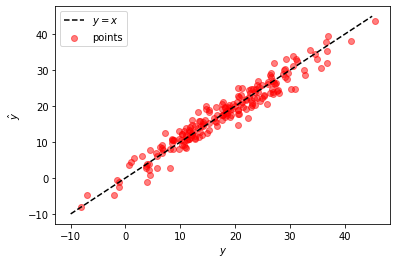

In [9]:
Xc3 = np.random.normal(loc=2, scale=2, size=(200,5))
yc3 = np.sum(Xc3,1)*2. - 2. + np.random.normal(loc=0, scale=2.5, size=(200,))

lm3 = LinearRegression().fit(Xc3, yc3)

plt.scatter(yc3, lm3.predict(Xc3), color='r', label='points', alpha=.5)
plt.plot([-10, 45], [-10, 45], 'k--', label=r"$y=x$")
plt.xlabel(r"$y$")
plt.ylabel(r"$\hat{y}$")
plt.legend()
plt.show()